In [1]:
from __future__ import print_function # Python 2/3 compatibility
import boto3
import json
import decimal


class DecimalEncoder(json.JSONEncoder):
    def default(self, o):
        if isinstance(o, decimal.Decimal):
            return str(o)
        return super(DecimalEncoder, self).default(o)


dynamodb = boto3.resource('dynamodb', region_name='us-west-2')
table = dynamodb.Table('A0195028B')
FD001 = {}
FD002 = {}
response = table.scan()
for n in range(1, 101):
    id_name = "FD001_" + str(n)
    FD001[id_name] = {}
    for j in response['Items'][0].keys():
        FD001[id_name][j] = []
    FD001[id_name].pop('Matric No')
    FD001[id_name].pop('id')
    FD001[id_name].pop('timestamp')
    FD001[id_name].pop('clientToken')
for n in range(1, 261):
    id_name = "FD002_" + str(n)
    FD002[id_name] = {}
    for j in response['Items'][0].keys():
        FD002[id_name][j] = []
    FD002[id_name].pop('Matric No')
    FD002[id_name].pop('id')
    FD002[id_name].pop('timestamp')
    FD002[id_name].pop('clientToken')
for i in response['Items']:
    if i['id'][4] == '1':
        for k in FD001[i['id']].keys():
            FD001[i['id']][k].append(float(i[k]))
    else:
        for k in FD002[i['id']].keys():
            FD002[i['id']][k].append(float(i[k]))

while 'LastEvaluatedKey' in response:
    response = table.scan(
        ExclusiveStartKey=response['LastEvaluatedKey']
    )
    for i in response['Items']:
        if i['id'][4] == '1':
            for k in FD001[i['id']].keys():
                FD001[i['id']][k].append(float(i[k]))
        else:
            for k in FD002[i['id']].keys():
                FD002[i['id']][k].append(float(i[k]))
print(FD001)

{'FD001_1': {'circle': [1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 112.0, 113.0, 114.0, 115.0, 116.0, 117.0, 118.0, 119.0, 120.0, 121.0, 122.0, 123.0, 124.0, 125.0, 126.0, 127.0, 128.0, 129.0, 130.0, 131.0, 132.0, 133.0, 134.0, 135.0, 136.0, 137.0, 138.0, 139.0, 140.0, 141.0, 142.0, 143.0, 144.0, 145.0, 146.0, 147.0, 148.0, 149.0, 150.0, 151.0, 152.0, 153.0, 154.0, 155.0,

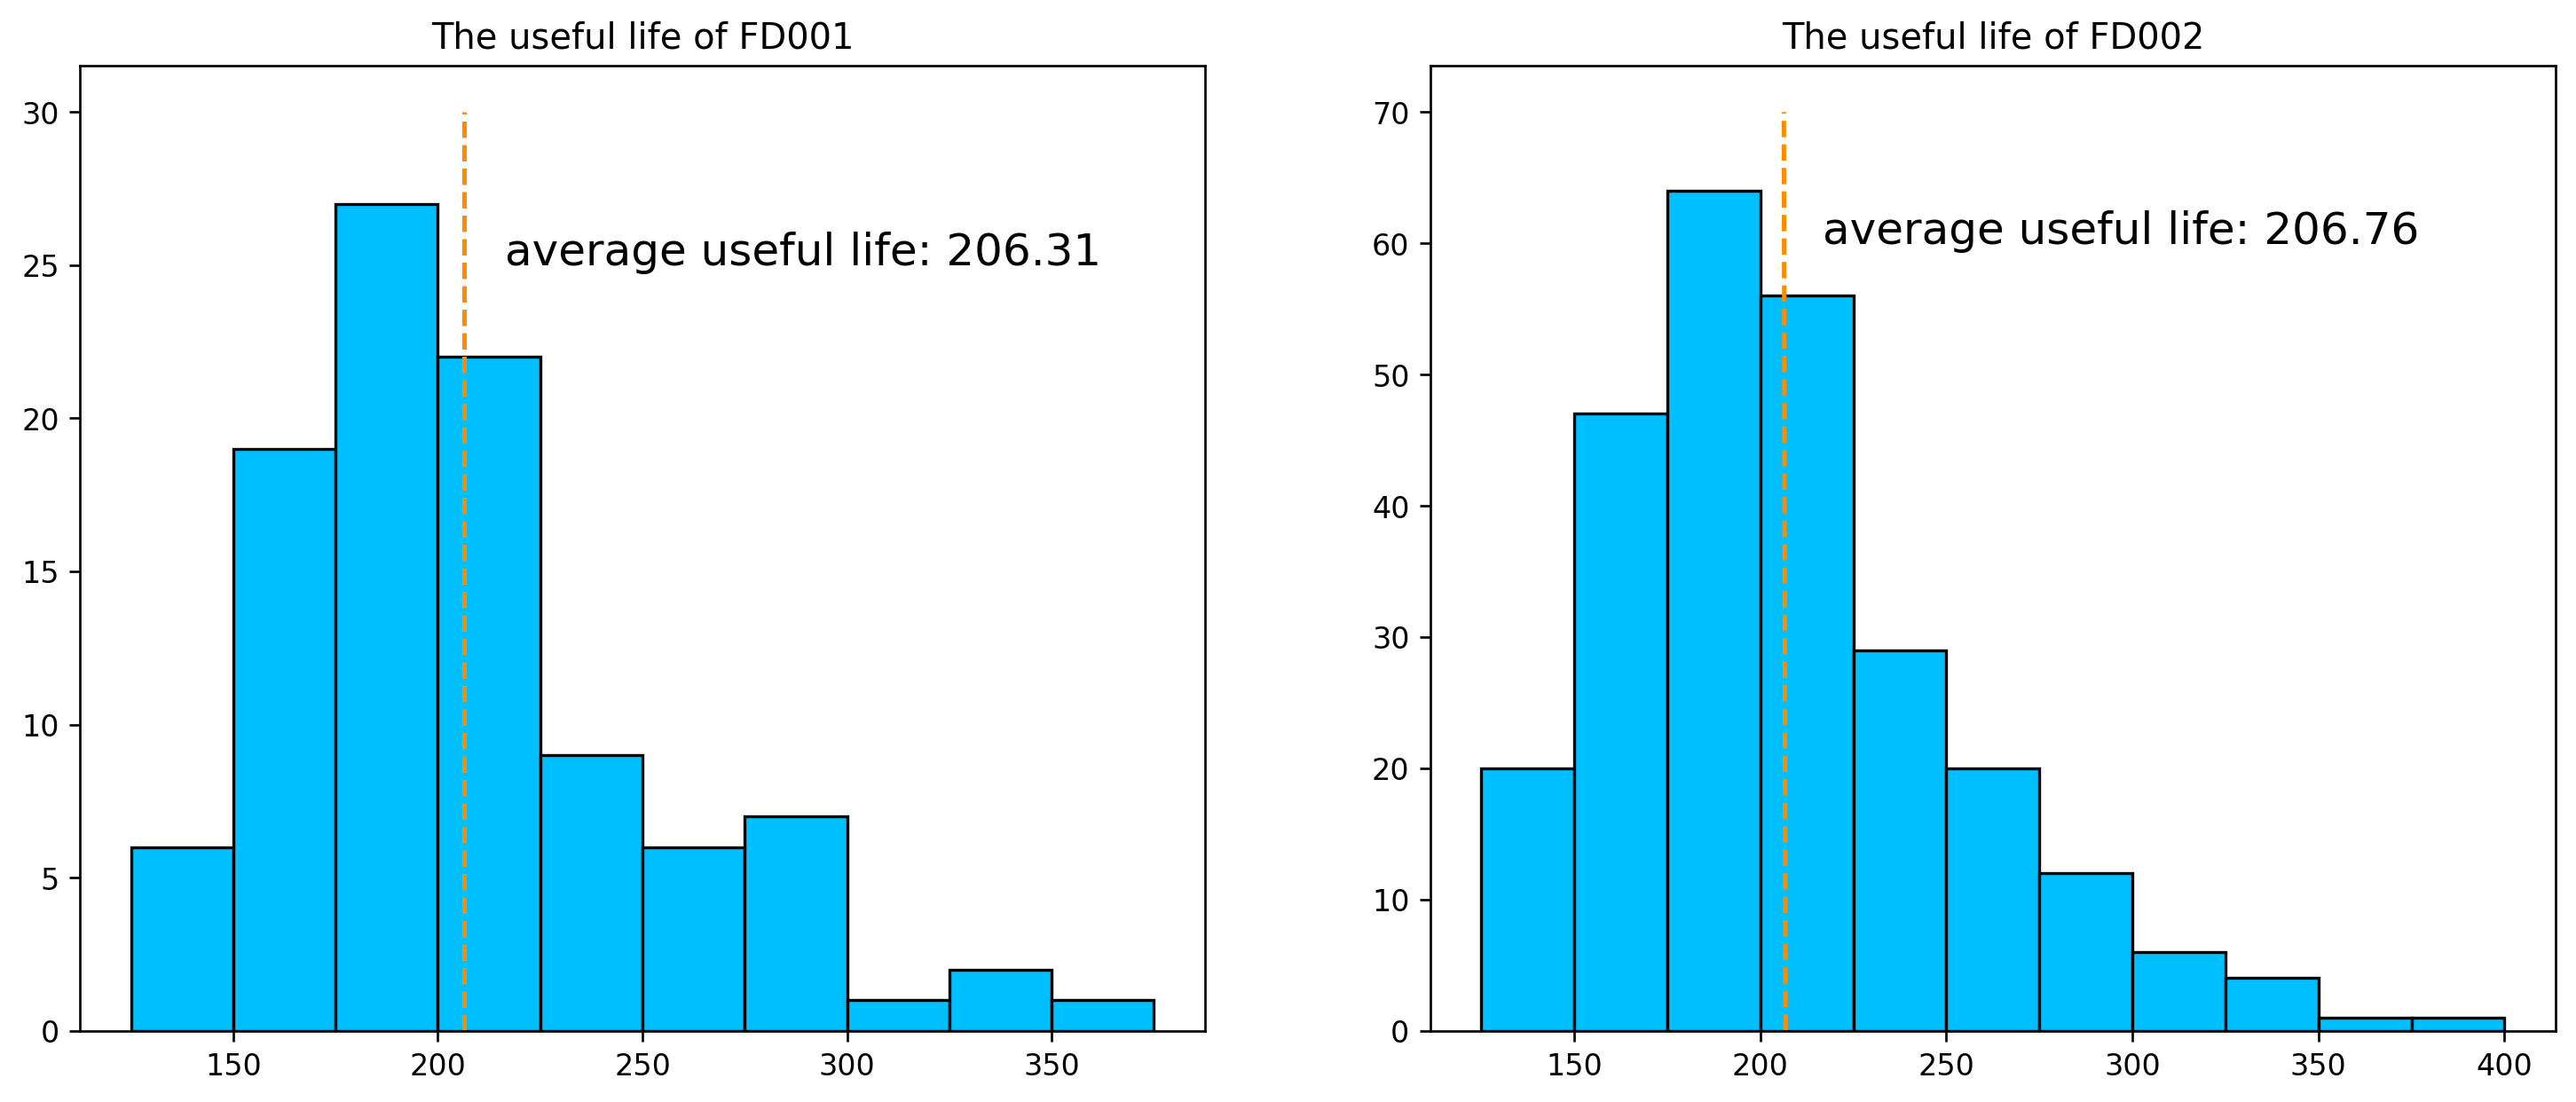

In [55]:
import numpy as np
from matplotlib import pyplot as plt
life_1 = []
life_2 = []
for i in range(1, 101):
    id_name = "FD001_" + str(i)
    life_1.append(len(FD001[id_name]['circle']))
for i in range(1, 261):
    id_name = "FD002_" + str(i)
    life_2.append(len(FD002[id_name]['circle']))
# life_2.sort()
# print(life_2)
# life_1.sort()
# print(life_1)
mean_1 = np.mean(life_1)
mean_2 = np.mean(life_2)
plt.figure(1,figsize=(15,6), dpi=240, facecolor="white")
plt.subplot(1,2,1)
plt.title("The useful life of FD001")
plt.hist(life_1, bins=10, range=(125, 375), density=0, facecolor="deepskyblue",edgecolor="black")
plt.text(mean_1+10, 25, "average useful life: "+str(round(mean_1, 2)), size = 15)
plt.plot([mean_1,mean_1],[0,30],color="darkorange",linestyle="--")
plt.subplot(1,2,2)
plt.title("The useful life of FD002")
plt.hist(life_2, bins=11, range=(125, 400), density=0, facecolor="deepskyblue",edgecolor="black")
plt.plot([mean_2,mean_1],[0,70],color="darkorange",linestyle="--")
plt.text(mean_2+10, 60, "average useful life: "+str(round(mean_2, 2)), size = 15)
plt.show()

In [3]:
import pandas as pd
FD1 = pd.DataFrame()
for i in range(1,101):
    name_id = "FD001_" + str(i)
    dFD = pd.DataFrame(FD001[name_id])
    FD1 = FD1.append(dFD)
order = ['circle', 'os1', 'os2', 'os3'] + ['sensor' + str(i) for i in range(1, 22)]
FD1 = FD1[order]
FD1.describe().transpose()
FD1.drop(['circle', 'sensor1', 'sensor5', 'sensor6', 'sensor10', 'sensor16', 'sensor18', 'sensor19', 'os3'], 
         axis=1, inplace=True)
FD2 = pd.DataFrame()
for i in range(1,261):
    name_id = "FD002_" + str(i)
    dFD = pd.DataFrame(FD002[name_id])
    FD2 = FD2.append(dFD)
order = ['circle', 'os1', 'os2', 'os3'] + ['sensor' + str(i) for i in range(1, 22)]
FD2 = FD2[order]

<Figure size 1440x960 with 0 Axes>

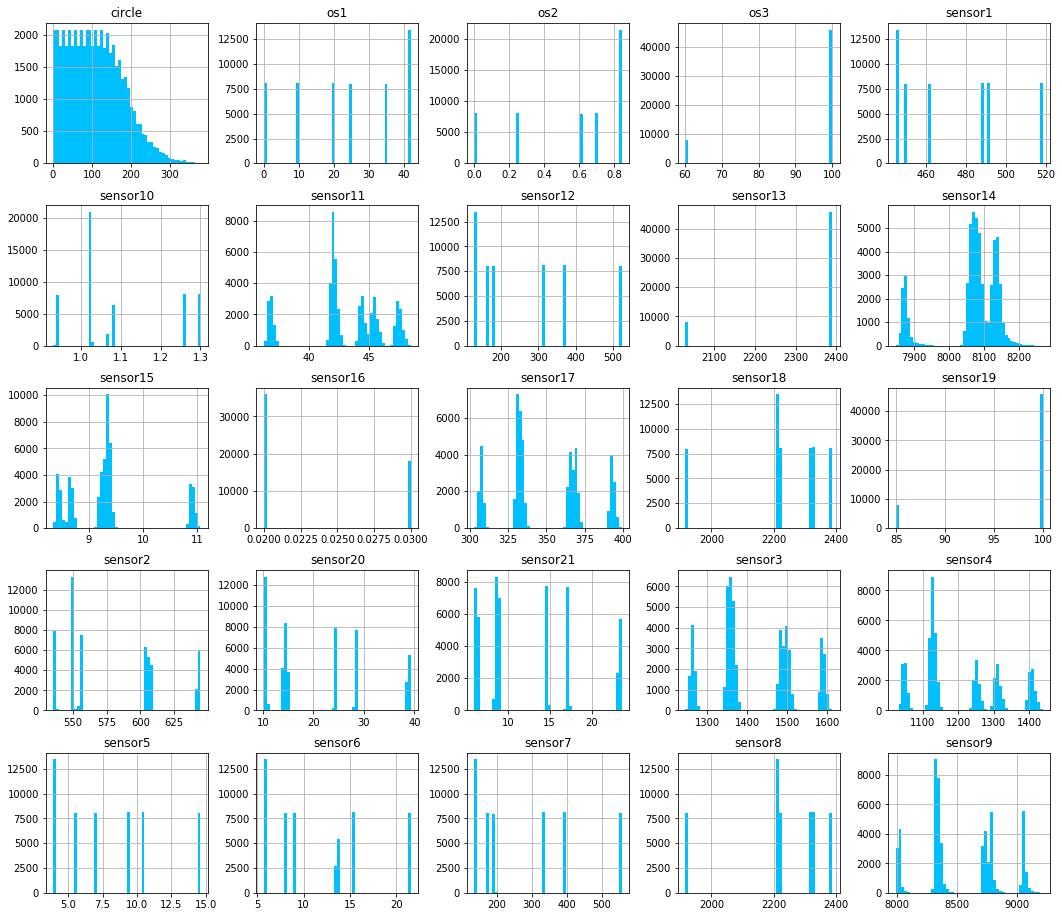

In [4]:
plt.figure(dpi=240)
FD2.hist(bins=50, figsize=(18,16),facecolor="deepskyblue")
plt.show()

<Figure size 1440x960 with 0 Axes>

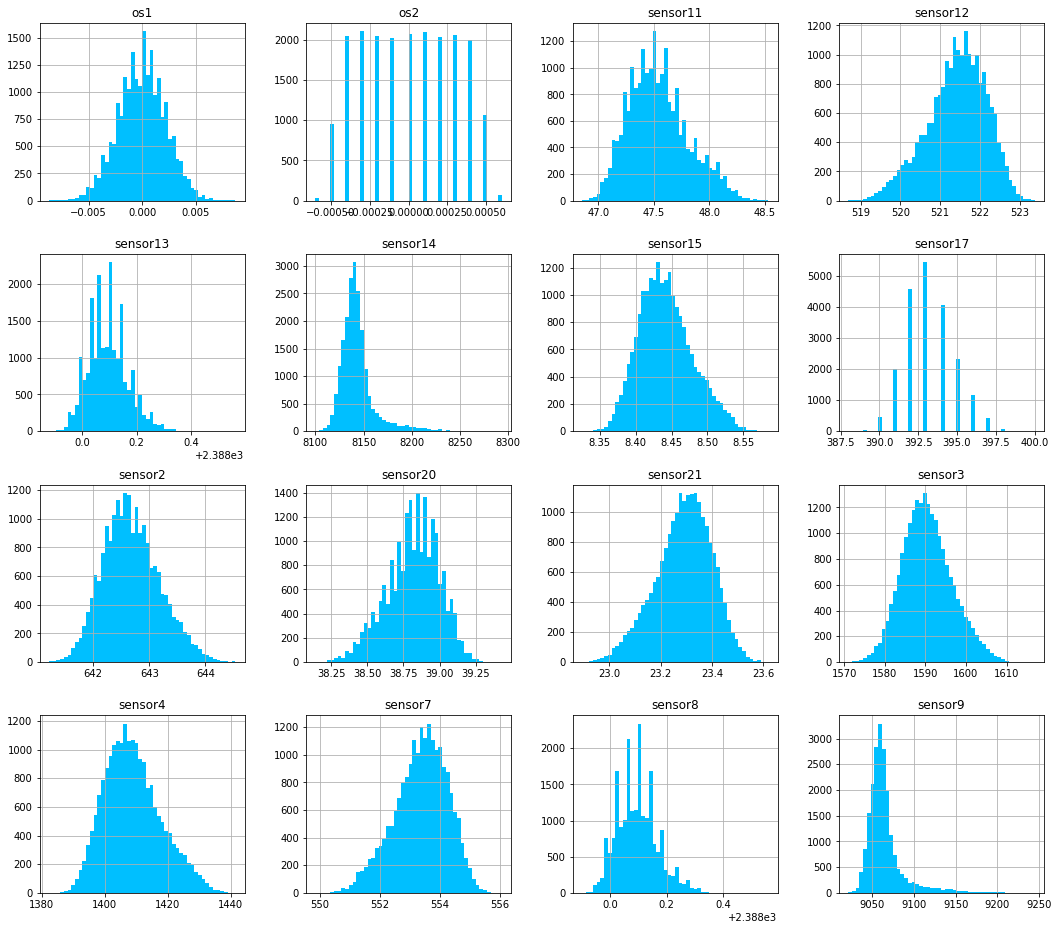

In [5]:
plt.figure(dpi=240)
FD1.hist(bins=50, figsize=(18,16),facecolor="deepskyblue")
plt.show()

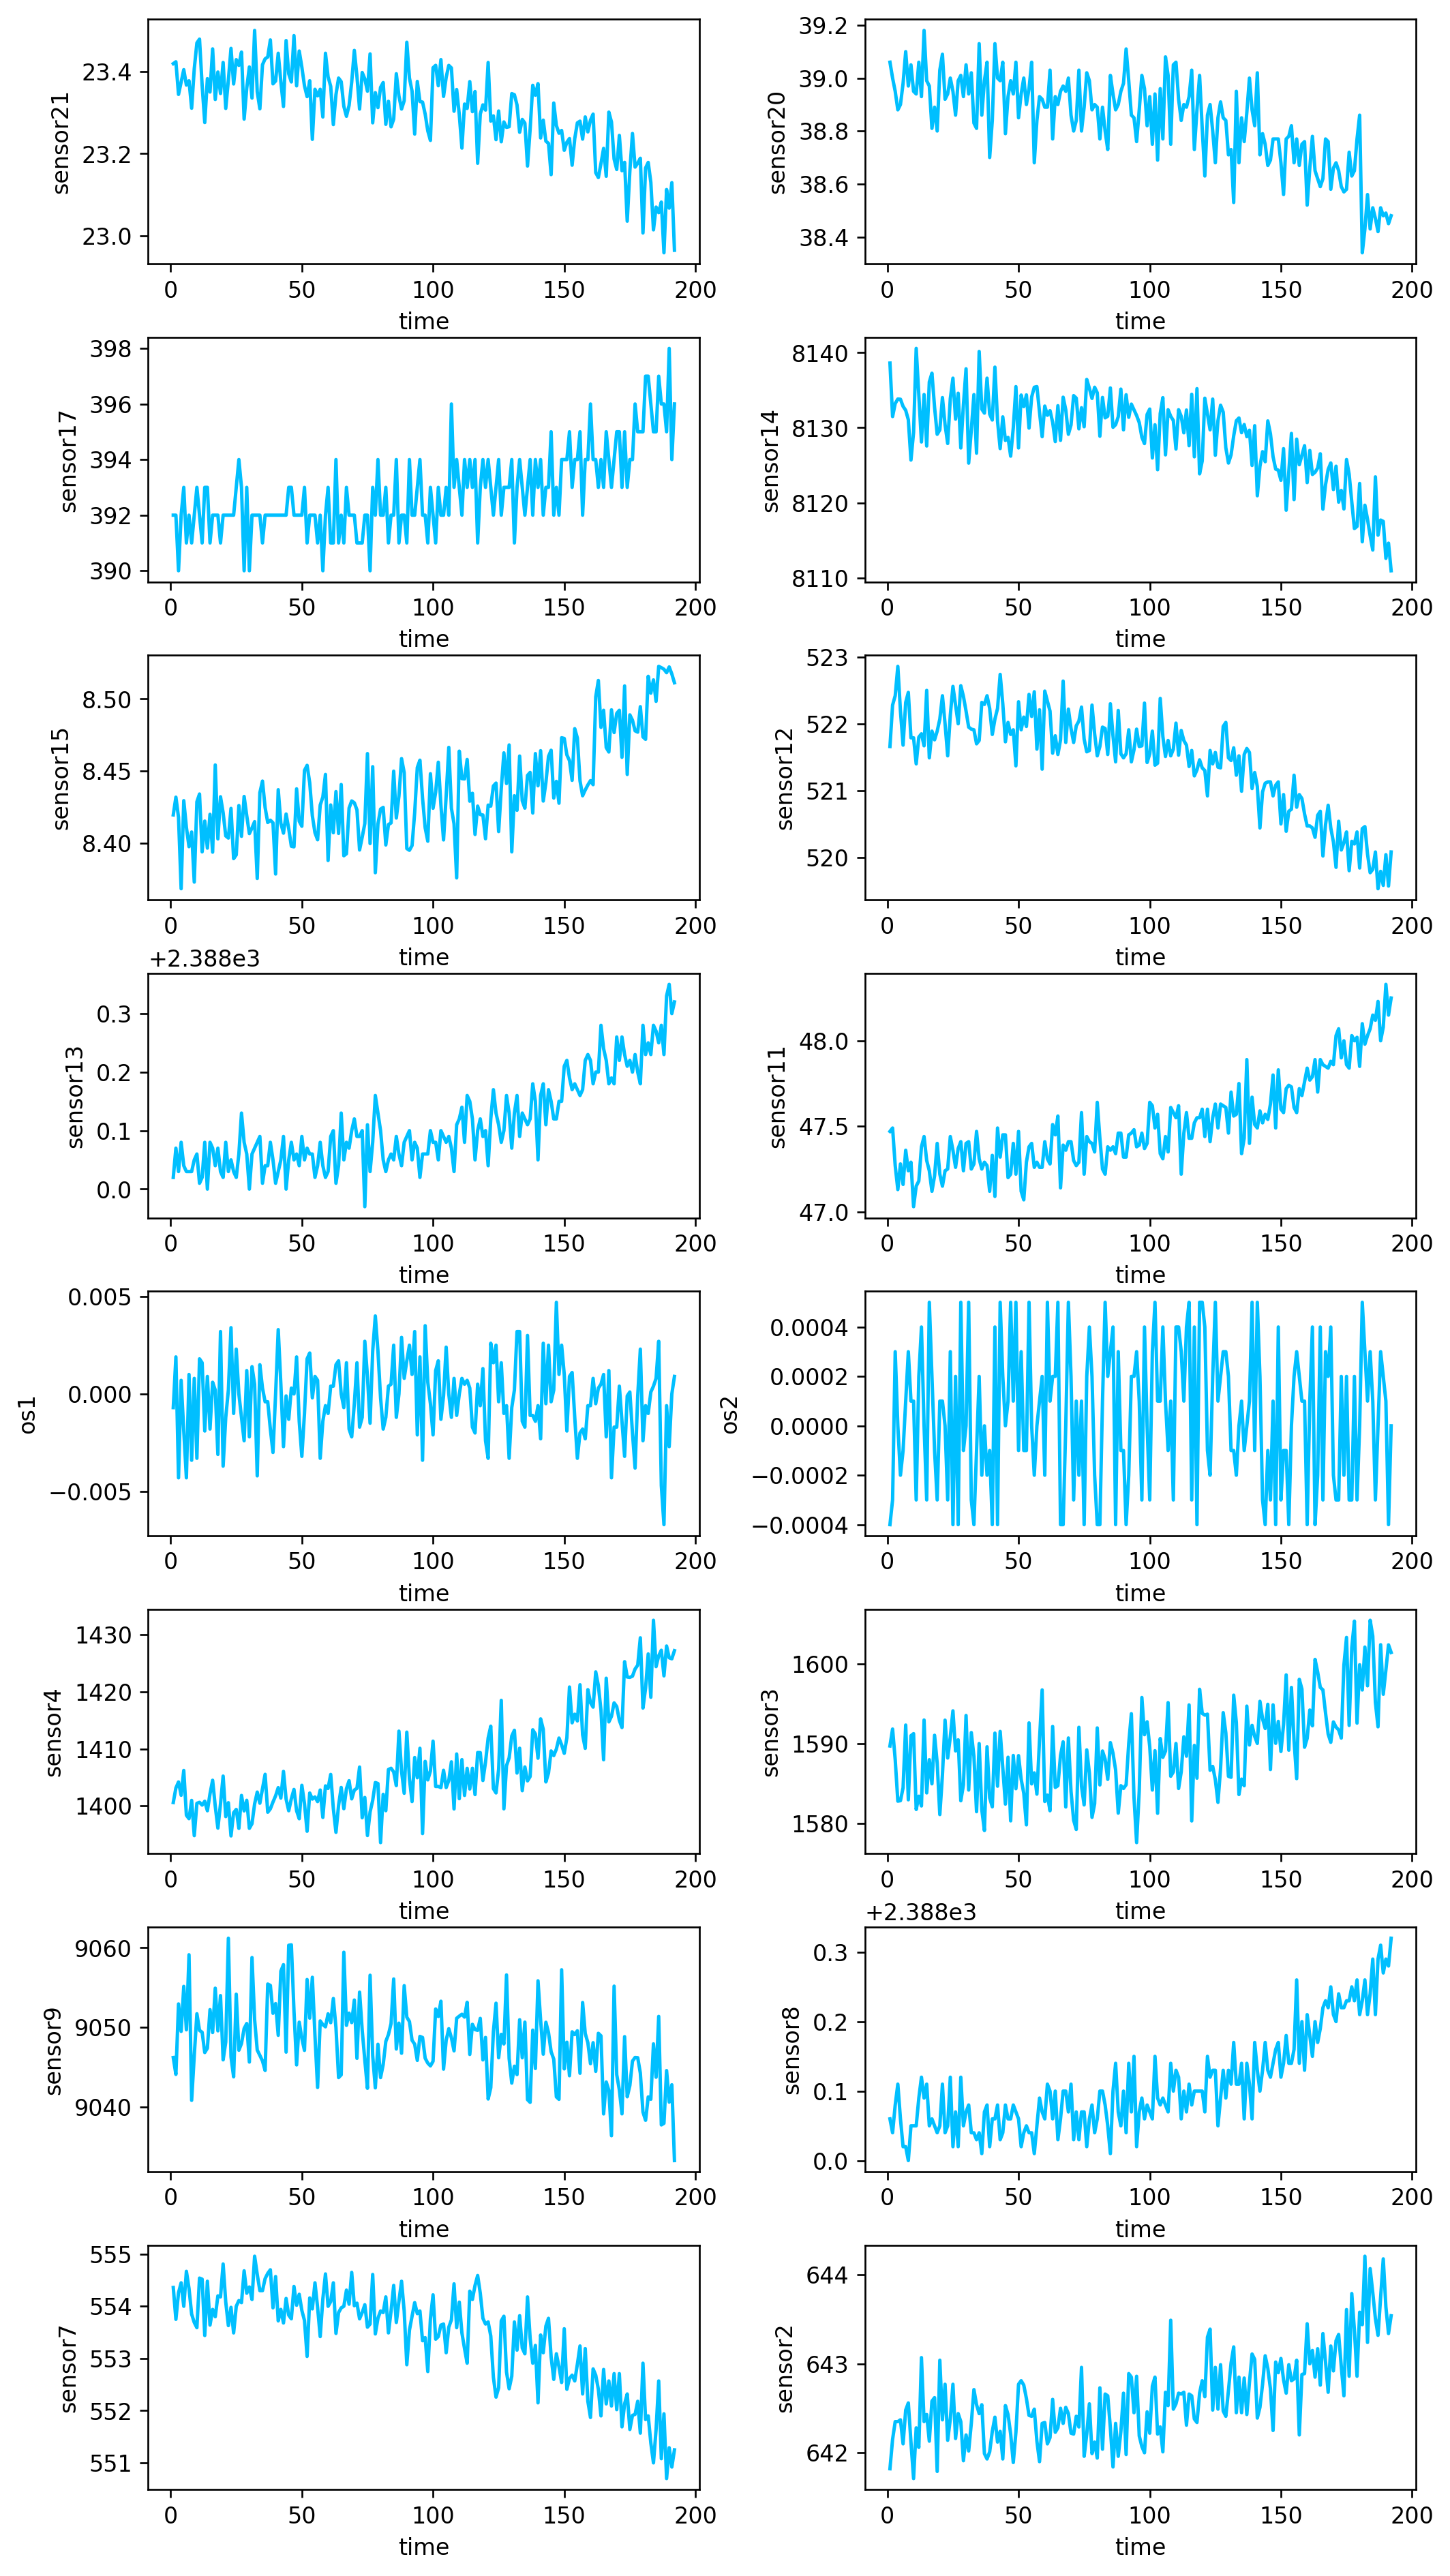

In [6]:
FD001_1 = FD001['FD001_1'].copy()
t = FD001_1['circle']
d = ['circle','sensor1','os3','sensor5','sensor6','sensor10','sensor16','sensor18','sensor19']
[FD001_1.pop(i) for i in d]
j = 1
plt.figure(figsize=(10,20), dpi=240)
for i in FD001_1.keys():
    plt.subplot(8,2,j)
    plt.plot(t, FD001_1[i], color='deepskyblue')
    plt.xlabel("time")
    plt.ylabel(i)
    j += 1
plt.subplots_adjust(wspace =0.3, hspace =0.3)
plt.show()

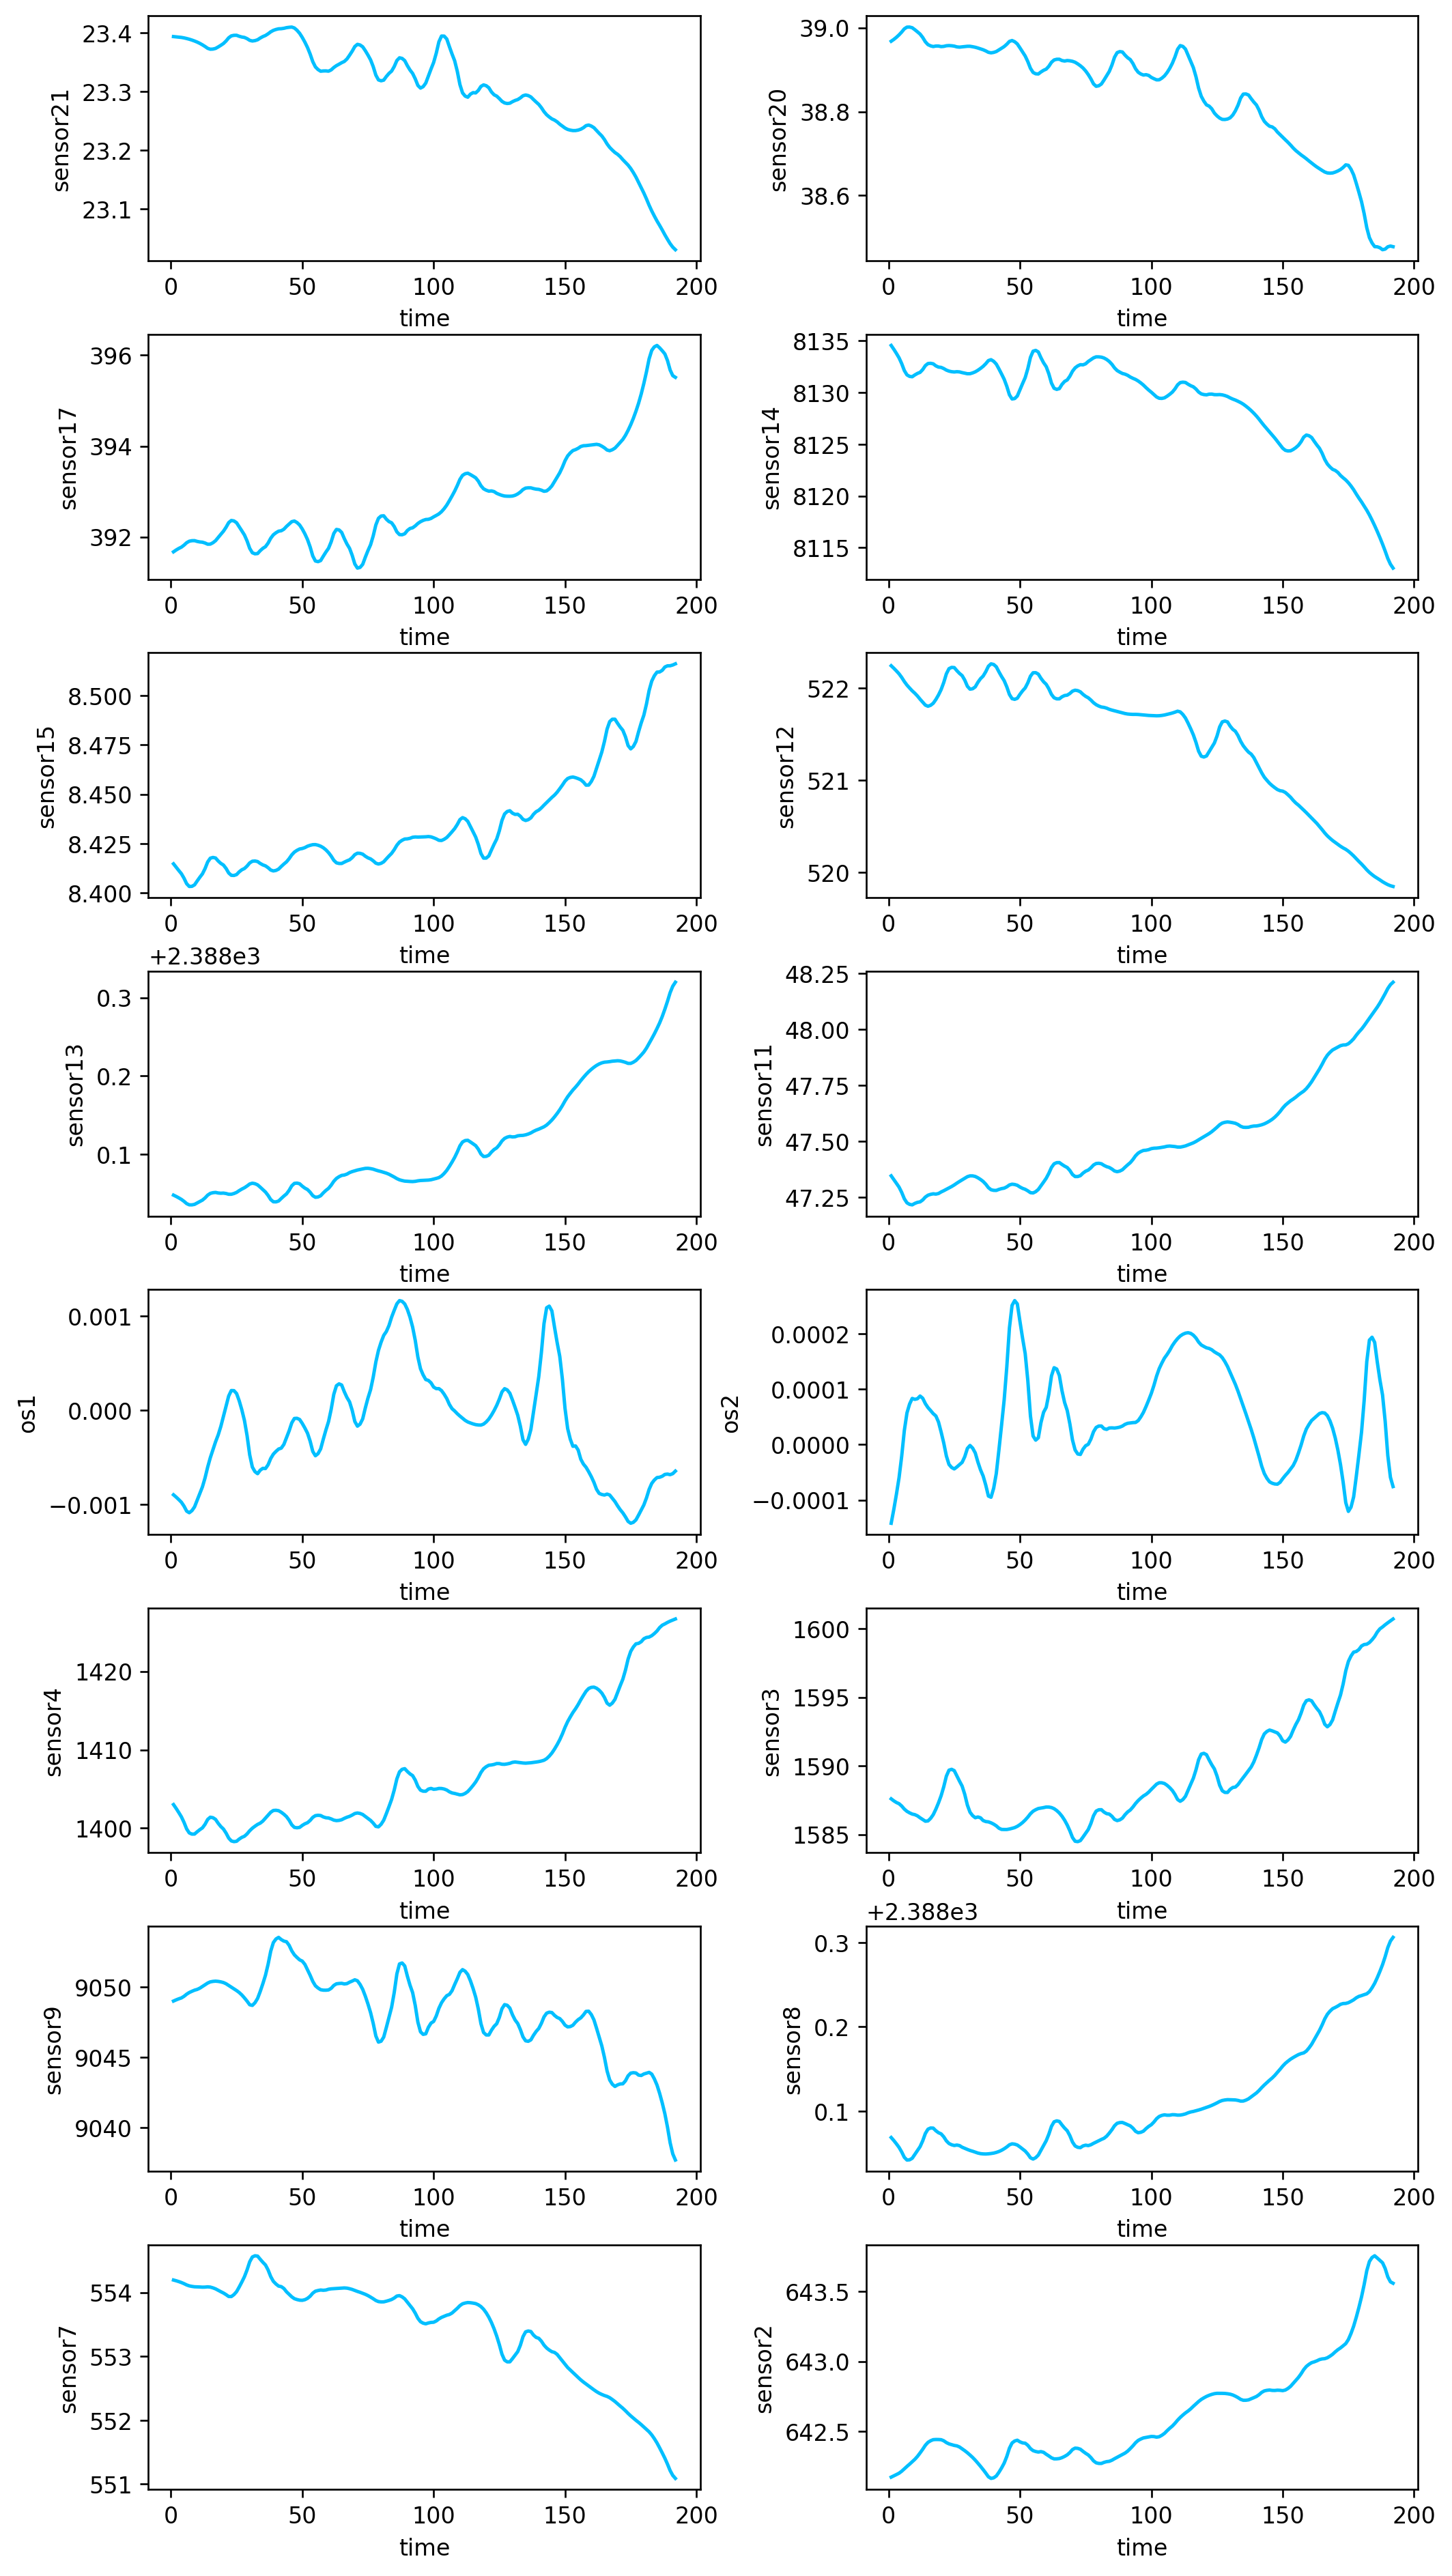

In [27]:
import pywt
def wavelet_denoising(data):
    db4 = pywt.Wavelet('db4')
    if type(data) is not None:
        coeffs = pywt.wavedec(data, db4)
        coeffs[-1] *= 0
        coeffs[-2] *= 0
        coeffs[-3] *= 0
        meta = pywt.waverec(coeffs, db4)
        return meta
plt.figure(figsize=(10,20), dpi=240)
j = 1
for i in FD001_1.keys():
    plt.subplot(8,2,j)
    w = wavelet_denoising(FD001_1[i])
    plt.plot(t, w, color='deepskyblue')
    plt.xlabel("time")
    plt.ylabel(i)
    j += 1
plt.subplots_adjust(wspace =0.3, hspace =0.3)
plt.show()